# NYC Trees in Long Island City BID

This tutorial demonstrates how to analyze tree data within the Long Island City Business Improvement District (BID) using Python, GeoPandas, and spatial analysis techniques.


In [23]:
# Ensure `geopandas` is installed to handle geographic data operations.
# This library is essential for working with spatial data in this tutorial.
!pip install geopandas --quiet
!pip install matplotlib --quiet


[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [24]:

# Import necessary libraries
# - `geopandas` for geographic data manipulation
# - `matplotlib.pyplot` for visualization
import geopandas as gpd
import matplotlib.pyplot as plt

In [25]:

# Load the trees dataset
# `trees_data` contains geographic locations of trees across NYC.
trees_data = gpd.read_file('./files/Forestry_Tree_Points.csv', encoding='utf-8')

# Load the Business Improvement Districts (BIDs) dataset
# `bid_data` includes geographic boundaries of BIDs across NYC.
bid_data = gpd.read_file('./files/NYC_BIDS_09112015.csv', encoding='utf-8')

In [26]:
# Convert the trees_data Location column from string to geometry format
trees_data['Location'] = gpd.GeoSeries.from_wkt(trees_data['Location'])

trees_data = gpd.GeoDataFrame(trees_data, geometry='Location')
trees_data

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
0,1045129,1,Full,Fair,0,98BE61F0-21C1-42C5-8B61-451D7D2F2249,POINT (-73.7970944304933170 40.7771343225013041),BE7E6F4A-4C65-440D-86C3-C9EF18482711,Malus - apple,2015-10-01 13:20:30.0000000,,,,,POINT (-73.79709 40.77713)
1,1372972,17,Full,Good,,0E83EC19-5714-4776-B7C5-65A222B45697,POINT (-73.7545598045751660 40.6746482832744931),906B2696-7FE4-4765-81DD-B5B6E4E5C2D9,Acer - maple,2015-10-29 14:04:00.0000000,,,,,POINT (-73.75456 40.67465)
2,1449291,2,Full,Fair,0,E613FB11-CC76-4461-9361-BA7C71662843,POINT (-73.7986140550362535 40.7213857265715546),2E424780-709E-4AE3-B1B4-C071A3673190,Malus - apple,2015-10-29 15:47:47.0000000,,,,,POINT (-73.79861 40.72139)
3,2263124,6,Full,Fair,0,B36837B6-A03F-45DC-BD4D-DB0BBEF8B2FC,POINT (-73.9150025865851177 40.8487445891240810),023BF968-1114-422B-BF60-646387AAD5C1,Acer - maple,2016-01-05 19:16:49.0000000,,,,,POINT (-73.915 40.84874)
4,2594581,4,Full,Good,0,9A37D3DF-AF98-4047-ADCC-8D0CDA568021,POINT (-74.1195598507131450 40.6136494687086511),AA1139D9-EEB3-427D-BF0A-9F6762CCB8C7,Malus - apple,2016-01-05 15:29:11.0000000,,,,,POINT (-74.11956 40.61365)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059290,15196914,3,Full,Excellent,,863C1716-18F2-44E9-BD4D-07FB4111084C,POINT (-73.9627038413468370 40.7152627304133219),7825C175-C3C4-4DCA-AC6C-2C8FCBD784AB,Tilia cordata 'Greenspire' - 'Greenspire' Litt...,2024-05-29 19:50:00.0000000,,2024-05-28 04:00:00.0000000,,,POINT (-73.9627 40.71526)
1059291,15369996,13,Full,Good,,E23B2D8E-1676-4E2D-9D54-365E8DB37B04,POINT (-73.8763938785616858 40.7579641129244905),D3B8B600-17C3-4BB3-AC8C-74F15B82BB27,Acer platanoides - Norway maple,2024-07-15 13:29:04.0000000,2024-07-15 13:29:53.0000000,,7,2024-07-15 13:29:53.0000000,POINT (-73.87639 40.75796)
1059292,15375536,5,Shaft,Dead,,935959DF-1131-4FAE-8060-2D45F35DE11A,POINT (-74.1089672383464091 40.5699080596199835),BFE4938C-330E-4D4C-8484-6A8ACE565F75,Thuja occidentalis - arborvitae,2024-07-16 15:18:38.0000000,2024-07-16 15:20:00.0000000,,,,POINT (-74.10897 40.56991)
1059293,15154009,3,Full,Excellent,,7D432489-2468-473E-914C-386F84FCE640,POINT (-73.9881528822799481 40.5927302132450336),B68D1FA9-932A-4C35-8346-51B74B157794,Ulmus propinqua 'Emerald Sunshine' - 'Emerald ...,2024-05-16 18:30:00.0000000,,2024-05-13 04:00:00.0000000,,,POINT (-73.98815 40.59273)


In [27]:

# Filter `bid_data` to include only the BID with Long Island City Partnership
# This BID will be our primary area of analysis.
lic_data = bid_data[bid_data['F_ALL_BI_2'] == "Long Island City Partnership"]

# Convert BID geometry from WKT strings to proper geometry format for geospatial analysis
lic_data['the_geom'] = gpd.GeoSeries.from_wkt(lic_data['the_geom'])
lic_data = gpd.GeoDataFrame(lic_data, geometry='the_geom')

# Use `explode` to ensure each geometry component is in a separate row, simplifying spatial analysis
exploded_lic_data = lic_data.explode()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_60156\3346220361.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lic_data['the_geom'] = gpd.GeoSeries.from_wkt(lic_data['the_geom'])


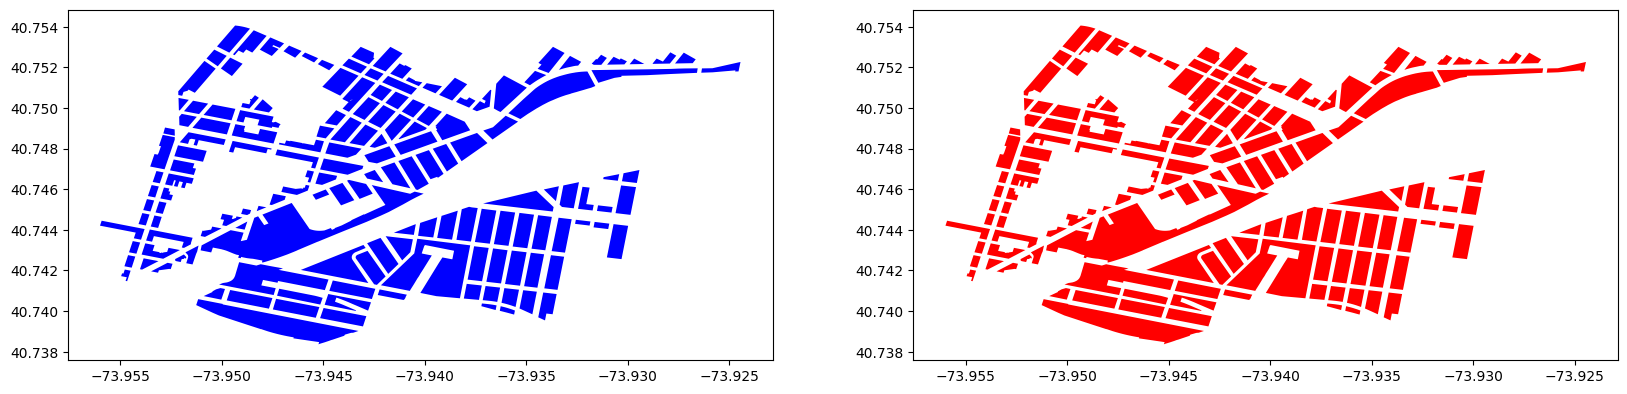

In [28]:
# plot the two datasets side by side
fig, ax = plt.subplots(1, 2,  figsize=(20, 10))

# plot the bid_data_objectid_2_0 geodataframe
lic_data.plot(ax=ax[0], color='blue', markersize=.01)
# plot the exploded geodataframe
exploded_lic_data.plot(ax=ax[1], color='red', markersize=.01)

plt.show()

In [29]:
# Get the bounding box of all exploded_lic_data geometry
bounding_box = exploded_lic_data.total_bounds

# Filter trees_data to include only trees within the bounding box
trees_within_bbox = trees_data.cx[bounding_box[0]                                  :bounding_box[2], bounding_box[1]:bounding_box[3]]

# Convert the filtered data to a GeoDataFrame
trees_within_bbox = gpd.GeoDataFrame(trees_within_bbox, geometry='Location')

# how many trees are within the bounding box
print("Number of trees within the bounding box: ", trees_within_bbox.shape[0])

Number of trees within the bounding box:  3927


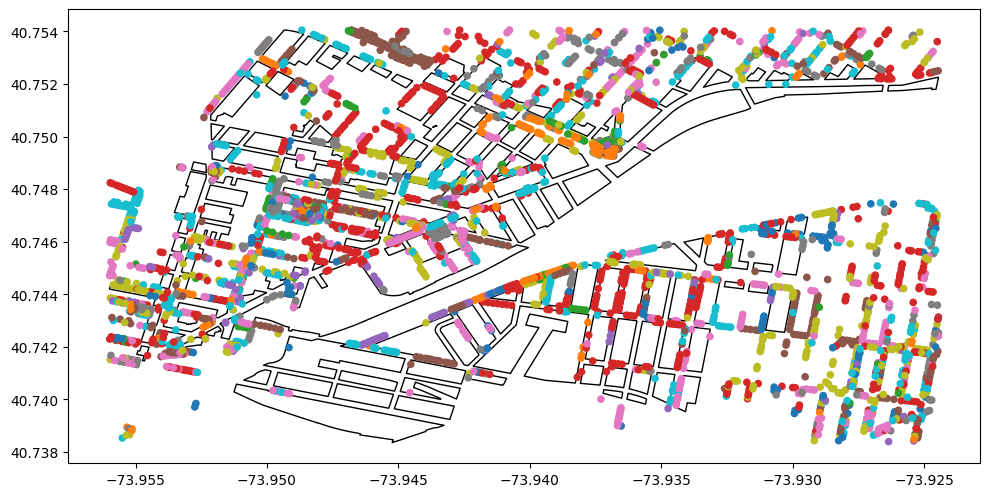

In [30]:
# Create a figure and axes with the desired size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot exploded_58 on the axes
exploded_lic_data.plot(ax=ax, edgecolor='black', facecolor='none', linewidth=1)

# Plot trees_within_bbox on the same axes
trees_within_bbox.plot(ax=ax, column='GenusSpecies', markersize=20)

# Optionally, you can adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [31]:
# add a color column to trees_within_bbox that gives a unique hex color to each GenusSpecies
trees_within_bbox['color'] = trees_within_bbox['GenusSpecies'].apply(
    lambda x: hash(x) % 16777215)

# print the first 5 rows of the trees_within_bbox dataframe
trees_within_bbox.head()

,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location,color
594,204756,2,Retired,Dead,,C9A4E9C8-AF04-4EDB-848C-E3F165A143F2,POINT (-73.9412403051480140 40.7472858629812720),878A918C-CA4D-4389-83B7-5C9971F76CF9,Ginkgo biloba - maidenhair tree,2015-05-29 12:33:00.0000000,2018-04-04 02:21:36.0000000,,,,POINT (-73.94124 40.74729),2029977
827,206824,6,Retired,Dead,,C03CD0F6-325F-43D5-95BF-74C15FD97A31,POINT (-73.9510875932518985 40.7427710157245642),38C69205-32D8-409A-8F6D-C2DFB01A22F5,Cercis canadensis - eastern redbud,2015-06-04 17:47:00.0000000,2020-02-15 15:44:00.0000000,,,,POINT (-73.95109 40.74277),11264739
2419,203526,0,Retired,Dead,17,5D25B576-18E7-4A46-97BA-5BA6322A3348,POINT (-73.9249459561142146 40.7454881850397683),404F99B6-9208-4E0A-BFE8-28DC26B86351,Acer platanoides - Norway maple,2015-05-28 11:19:00.0000000,2018-10-25 16:41:16.0000000,,,,POINT (-73.92495 40.74549),13167749
2695,203976,4,Retired,Dead,,36531EF1-1AAB-4F7D-941D-6FD5DDAB6487,POINT (-73.9521430615837971 40.7430274677670283),2C673FE8-115B-4FF5-933C-BD72673B4B7E,Carpinus caroliniana - American hornbeam,2015-05-29 12:13:00.0000000,2020-02-13 17:20:00.0000000,,,,POINT (-73.95214 40.74303),7137093
4891,196632,23,Stump,Poor,,8085878D-E301-483C-A5D3-8A2D02B3FE23,POINT (-73.9274285239987563 40.7402977185180859),84352670-D28F-4908-9274-9C9D78BF4A2B,Platanus x acerifolia - London planetree,2015-07-23 16:13:00.0000000,2019-03-29 12:02:00.0000000,,9,2018-07-25 09:05:00.0000000,POINT (-73.92743 40.7403),15451144


In [32]:

# save trees_within_bbox as  a json file
trees_within_bbox.to_file("./files/trees_within_bbox.json", driver='GeoJSON')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [33]:
exploded_lic_data.to_file("./files/exploded_lic_data.json", driver='GeoJSON')

c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\pyogrio\geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(
